# 卡方检验未使用的部分

卡方检验的公式：

$$
\chi^2=\sum \frac{(O-E)^2}{E}
$$

说明：$O$ 是观测值（实际值），$E$ 是理论值（可以认为是期望值）。


In [34]:
from scipy import stats
from scipy.stats import chi2_contingency


def custom_chi2_contingency(observed):
    """
    自己编写的卡方检验的函数，返回
    """
    # 每一行求和
    row = observed.sum(axis=1)
    # 每一列求和
    col = observed.sum(axis=0)
    # 总数求和
    all_sum = observed.sum()

    # meshgrid 生成网格
    x1, x2 = np.meshgrid(col, row)
    # 期望频数
    expected_count = x1 * x2 / all_sum
    # 统计量，即卡方值
    chi2 = ((observed - expected_count)**2 / expected_count).sum()
    # 自由度
    df = (len(row) - 1) * (len(col) - 1)
    # 计算 p 值，这里用到了卡方分布的概率积累函数，
    # 因为这个 cdf 是计算从左边到这点的累计积分，因此用 1 减它
    p = 1 - stats.chi2.cdf(chi2, df=df)
    return chi2, p, df, expected_count

## 对比1：吴亦凡的例子

参考资料：https://segmentfault.com/a/1190000003719712

In [10]:
arr = np.array([[19, 24], [34, 10]])

result1 = lw_chi2_contingency(arr)
result2 = chi2_contingency(arr)
print(result1)
print(result2)

(9.999815802502738, 0.0015655588405594223, 1, array([[26.1954023, 16.8045977],
       [26.8045977, 17.1954023]]))
(8.65835111269367, 0.0032556577008675054, 1, array([[26.1954023, 16.8045977],
       [26.8045977, 17.1954023]]))


## 对比2：官方文档给出的例子

In [11]:
obs = np.array([[10, 10, 20], [20, 20, 20]])
result1 = lw_chi2_contingency(obs)
result2 = chi2_contingency(obs)
print(result1)
print(result2)

(2.7777777777777777, 0.24935220877729614, 2, array([[12., 12., 16.],
       [18., 18., 24.]]))
(2.7777777777777777, 0.2493522087772962, 2, array([[12., 12., 16.],
       [18., 18., 24.]]))


## 对比3：

In [37]:
obs = np.array([[178, 272], [38, 502]])
result1 = custom_chi2_contingency(obs)
result2 = chi2_contingency(obs)
print('自定义卡方检验的函数返回：')
print(result1)
print()
print('scipy 提供的卡方检验返回：')
print(result2)

自定义卡方检验的函数返回：
(152.16271892047084, 0.0, 1, array([[ 98.18181818, 351.81818182],
       [117.81818182, 422.18181818]]))

scipy 提供的卡方检验返回：
(150.2623232486362, 1.5192261812214016e-34, 1, array([[ 98.18181818, 351.81818182],
       [117.81818182, 422.18181818]]))


这里 $p$ 值比 $0.05$ 小，所以应该拒绝原假设。

## 对比4：

参考资料：https://www.shuxuele.com/data/chi-square-test.html


| 性别\度假方式 | 沙滩  | 游轮  | 总计  |
| ------------- | ----- | ----- | ----- |
| 男            | $209$ | $280$ | $489$ |
| 女            | $225$ | $248$ | $473$ |
| 总计        | $434$ | $528$ | $962$ |

理论分布：

| 性别\度假方式 | 沙滩  | 游轮  |
| ------------- | ----- | ----- |
| 男            | $434 \times \frac{489}{962} = 220.61$ | $528 \times \frac{489}{962} = 268.39 $ |
| 女            | $434 \times \frac{473}{962} = 213.39$ | $528 \times \frac{473}{962} = 259.61$ |


In [13]:
obs = np.array([[209, 280], [225, 248]])
result1 = lw_chi2_contingency(obs)
result2 = chi2_contingency(obs)
print(result1)
print(result2)

(2.2637696373944167, 0.13243135094767922, 1, array([[220.60914761, 268.39085239],
       [213.39085239, 259.60914761]]))
(2.0729701044219957, 0.14992929199159188, 1, array([[220.60914761, 268.39085239],
       [213.39085239, 259.60914761]]))


返回：检验统计量，p 值，自由度，理论分布，这里 p 值比 0.05 大，所以不拒绝原假设。

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


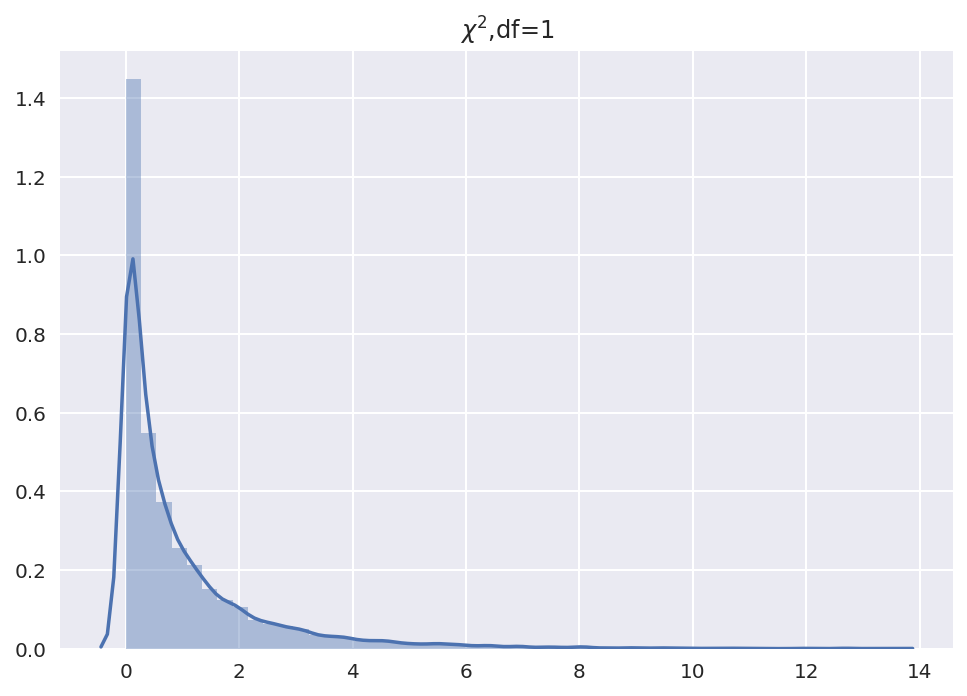

In [25]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


samples = stats.chi2.rvs(size=10000, df=1)
sns.distplot(samples)
plt.title('$\chi^2$,df=1')
plt.show()

In [26]:
stats.chi2.pdf(152.15, df=1)

2.956796099836173e-35

我自己总结的文章：

白话“卡方检验”
https://blog.csdn.net/lw_power/article/details/83958476

---

卡方检验用于文本分类中的特征提取
https://blog.csdn.net/chuchus/article/details/44041375

用python进行列联表卡方检验
https://zhuanlan.zhihu.com/p/42470566

卡方检验计算器：https://www.shuxuele.com/data/chi-square-test.html




卡方检验原理及应用：https://segmentfault.com/a/1190000003719712
https://www.cnblogs.com/emanlee/archive/2008/10/25/1319569.html




![Jietu20180911-195948@2x.jpg](https://upload-images.jianshu.io/upload_images/414598-34f8a823e82a9e99.jpg?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

使用 Python 计算：
![Jietu20180911-221645@2x.jpg](https://upload-images.jianshu.io/upload_images/414598-7bc219e6ae0a5154.jpg?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

参考资料：












